In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from env import get_db_url
import os
from sklearn.model_selection import train_test_split
import pandas as pd
from pydataset import data
from env import get_db_url
import pandas as pd
import numpy as np
import wrangle_zillow as w
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
df = w.new_zillow_data()

In [3]:
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclassdesc,heatingorsystemtypeid,heatingorsystemdesc,propertylandusetypeid,propertylandusedesc,storytypeid,storydesc,typeconstructiontypeid,typeconstructiondesc,parcelid
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,None,NaN,None,261.0,Single Family Residential,NaN,None,NaN,None,14297519
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,None,NaN,None,261.0,Single Family Residential,NaN,None,NaN,None,17052889
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,None,NaN,None,261.0,Single Family Residential,NaN,None,NaN,None,14186244
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,None,2.0,Central,261.0,Single Family Residential,NaN,None,NaN,None,12177905
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,None,2.0,Central,266.0,Condominium,NaN,None,NaN,None,10887214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,None,2.0,Central,261.0,Single Family Residential,NaN,None,NaN,None,11000655
77610,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,None,NaN,None,261.0,Single Family Residential,NaN,None,NaN,None,17239384
77611,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,None,2.0,Central,261.0,Single Family Residential,NaN,None,NaN,None,12773139
77612,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,None,2.0,Central,261.0,Single Family Residential,NaN,None,NaN,None,12826780


In [4]:
df.fips.value_counts()

6037.0    50697
6059.0    20631
6111.0     6252
Name: fips, dtype: int64

In [5]:
df = w.get_zillow_data()

In [6]:
df

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,buildingclassdesc,heatingorsystemtypeid.1,heatingorsystemdesc,propertylandusetypeid.1,propertylandusedesc,storytypeid.1,storydesc,typeconstructiontypeid.1,typeconstructiondesc,parcelid.2
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,NaN,NaN,NaN,261.0,Single Family Residential,NaN,NaN,NaN,NaN,14297519
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,NaN,NaN,NaN,261.0,Single Family Residential,NaN,NaN,NaN,NaN,17052889
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,NaN,NaN,NaN,261.0,Single Family Residential,NaN,NaN,NaN,NaN,14186244
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,NaN,2.0,Central,261.0,Single Family Residential,NaN,NaN,NaN,NaN,12177905
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,NaN,2.0,Central,266.0,Condominium,NaN,NaN,NaN,NaN,10887214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,NaN,2.0,Central,261.0,Single Family Residential,NaN,NaN,NaN,NaN,11000655
77610,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,NaN,NaN,NaN,261.0,Single Family Residential,NaN,NaN,NaN,NaN,17239384
77611,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,NaN,2.0,Central,261.0,Single Family Residential,NaN,NaN,NaN,NaN,12773139
77612,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,NaN,2.0,Central,261.0,Single Family Residential,NaN,NaN,NaN,NaN,12826780


In [7]:
df.fips.value_counts()

6037.0    50697
6059.0    20631
6111.0     6252
Name: fips, dtype: int64

In [8]:
df = w.prep_zillow_data(df)

In [9]:
df

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,...,1023282.0,2016.0,537569.0,11013.72,60590630072012.0,0,0.025595,2017-01-01,NaN,Single Family Residential
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,464000.0,2016.0,376000.0,5672.48,61110010023006.0,1,0.055619,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,564778.0,2016.0,479489.0,6488.3,60590218022012.0,2,0.005383,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,145143.0,2016.0,36225.0,1777.51,60373001001006.0,3,-0.10341,2017-01-01,Central,Single Family Residential
6,781532,12095076,3.0,4.0,9.0,3.0,2962.0,2962.0,6037.0,3.0,...,773303.0,2016.0,496619.0,9516.26,60374608001014.0,6,-0.001011,2017-01-01,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77609,673515,11000655,2.0,2.0,6.0,2.0,1286.0,1286.0,6037.0,2.0,...,354621.0,2016.0,283704.0,4478.43,60371014003002.0,77609,0.020615,2017-09-20,Central,Single Family Residential
77610,2968375,17239384,2.0,4.0,NaN,2.0,1612.0,1612.0,6111.0,2.0,...,67205.0,2016.0,16522.0,1107.48,61110084022016.0,77610,0.013209,2017-09-21,NaN,Single Family Residential
77611,1843709,12773139,1.0,3.0,4.0,1.0,1032.0,1032.0,6037.0,1.0,...,49546.0,2016.0,16749.0,876.43,60374338022005.0,77611,0.037129,2017-09-21,Central,Single Family Residential
77612,1187175,12826780,2.0,3.0,6.0,2.0,1762.0,1762.0,6037.0,2.0,...,522000.0,2016.0,382000.0,6317.15,60375034021020.0,77612,0.007204,2017-09-25,Central,Single Family Residential


In [10]:
df.fips.value_counts()

6037.0    35988
6059.0    14147
6111.0     4405
Name: fips, dtype: int64

In [11]:
train, test, validate = w.wrangle_zillow()

In [12]:
train.shape

(30542, 35)

In [13]:
train.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           10557
calculatedbathnbr                 101
calculatedfinishedsquarefeet       73
finishedsquarefeet12              161
fips                                0
fullbathcnt                       101
heatingorsystemtypeid           10481
latitude                            0
longitude                           0
lotsizesquarefeet                 237
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              10506
rawcensustractandblock              0
regionidcity                      642
regionidcounty                      0
regionidzip                        15
roomcnt                             0
unitcnt                         10508
yearbuilt                          90
structuretaxvaluedollarcnt         57
taxvaluedollarcnt                   1
assessmentye

In [14]:
for column, dtype in train.dtypes.items():
    print(f"{column}: {dtype}")


id: object
parcelid: object
bathroomcnt: float64
bedroomcnt: object
buildingqualitytypeid: object
calculatedbathnbr: object
calculatedfinishedsquarefeet: object
finishedsquarefeet12: object
fips: object
fullbathcnt: object
heatingorsystemtypeid: object
latitude: object
longitude: object
lotsizesquarefeet: object
propertycountylandusecode: object
propertylandusetypeid: object
propertyzoningdesc: object
rawcensustractandblock: object
regionidcity: object
regionidcounty: object
regionidzip: object
roomcnt: object
unitcnt: object
yearbuilt: float64
structuretaxvaluedollarcnt: object
taxvaluedollarcnt: object
assessmentyear: object
landtaxvaluedollarcnt: object
taxamount: float64
censustractandblock: object
id.1: object
logerror: object
transactiondate: object
heatingorsystemdesc: object
propertylandusedesc: object


In [15]:
train

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id.1,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
12285,2335412,12837700,0.111111,3.0,6.0,2.0,1141.0,1141.0,6037.0,2.0,...,246110.0,2016.0,169047.0,0.005218,60374078012006.0,12285,-0.050543,2017-02-24,Central,Single Family Residential
21818,670177,17235552,0.166667,4.0,NaN,3.0,2347.0,2347.0,6111.0,3.0,...,651348.0,2016.0,423532.0,0.012582,61110079031000.0,21818,-0.006476,2017-03-30,NaN,Single Family Residential
47992,847468,14336069,0.166667,4.0,NaN,3.0,2742.0,2742.0,6059.0,3.0,...,159393.0,2016.0,38332.0,0.003479,60590756043004.0,47992,-0.114215,2017-06-19,NaN,Single Family Residential
6592,1252603,11322133,0.111111,4.0,8.0,2.0,2545.0,2545.0,6037.0,2.0,...,252149.0,2016.0,52842.0,0.012174,60379012054123.0,6592,0.024693,2017-01-30,Solar,Single Family Residential
30396,2646158,12258019,0.111111,3.0,6.0,2.0,1744.0,1744.0,6037.0,2.0,...,55864.0,2016.0,15505.0,0.001987,60375409022011.0,30396,0.003551,2017-04-27,Central,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36849,620038,12711656,0.222222,4.0,11.0,4.0,4036.0,4036.0,6037.0,4.0,...,1410161.0,2016.0,729790.0,0.026950,60376704061000.0,36849,-0.012159,2017-05-17,Central,Single Family Residential
2596,2582407,11059295,0.111111,4.0,6.0,2.0,1631.0,1631.0,6037.0,2.0,...,450380.0,2016.0,299415.0,0.009598,60371114001006.0,2596,0.414624,2017-01-12,Central,Single Family Residential
65214,129755,13889489,0.166667,3.0,NaN,3.0,2239.0,2239.0,6059.0,3.0,...,560008.0,2016.0,285067.0,0.010528,60590628001011.0,65214,0.036039,2017-08-10,NaN,Single Family Residential
10561,1159009,13940178,0.111111,4.0,NaN,2.0,1504.0,1504.0,6059.0,2.0,...,419916.0,2016.0,339514.0,0.007781,60590758071003.0,10561,-0.582188,2017-02-17,NaN,Single Family Residential


In [86]:
train.assessmentyear.value_counts()

2016.0    30542
Name: assessmentyear, dtype: int64

In [16]:
train.fips.value_counts()

6037.0    20094
6059.0     7931
6111.0     2517
Name: fips, dtype: int64

In [17]:
validate.fips.value_counts()

6037.0    7213
6059.0    2803
6111.0     892
Name: fips, dtype: int64

# 1. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### Ho: Logerror is not significantly different for all 3 counties.
### Ha: Logerror is significantly different for all 3 counties.

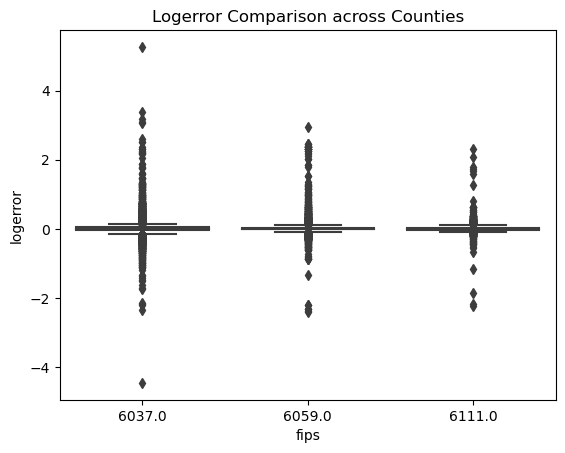

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot to compare logerror across counties
sns.boxplot(data=train, x='fips', y='logerror')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.title('Logerror Comparison across Counties')
plt.show()


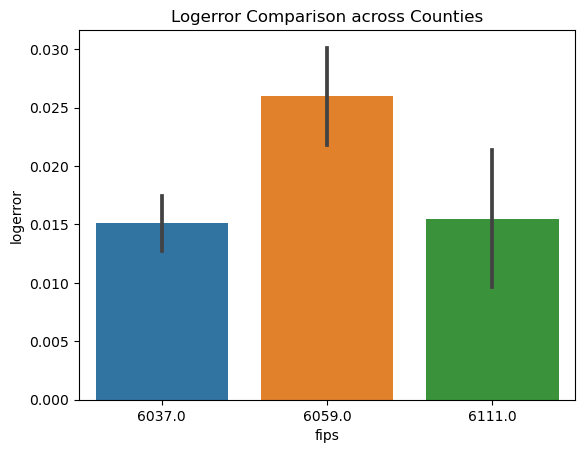

In [19]:
sns.barplot(data=train, x='fips', y='logerror')
plt.xlabel('fips')
plt.ylabel('logerror')
plt.title('Logerror Comparison across Counties')
plt.show()

In [26]:
df.logerror.dtype

dtype('O')

In [28]:
df['logerror'] = df['logerror'].astype(float)
df['fips'] = df['fips'].astype(float)


In [32]:
group1 = df[df['fips'] == 6037]['logerror']
group2 = df[df['fips'] == 6059]['logerror']
group3 = df[df['fips'] == 6111]['logerror']
alpha = 0.05
test_statistic, p_value = stats.f_oneway(group1, group2, group3)


print("Test Statistic (F-value):", test_statistic)
print("p-value:", p_value)


Test Statistic (F-value): 20.679804060530184
p-value: 1.052637962074029e-09


In [33]:
p_value < alpha

True

### We can reject the null hypothesis, therefore Logerror is significantly different for all 3 counties.

# 2. Does log error have a relation with taxvaluedollarcnt?

### Ho: Logerror does not have a relation with taxvaluedollarcnt
### Ha: Logerror does have a relation with taxvaluedollarcnt

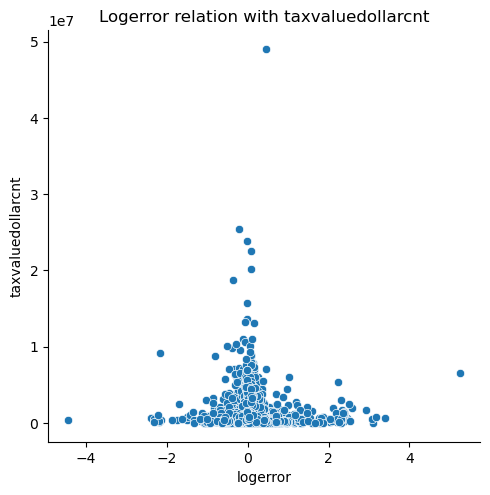

In [37]:
# Create a box plot to compare logerror across counties
sns.relplot(data=train, x='logerror', y='taxvaluedollarcnt')
plt.xlabel('logerror')
plt.ylabel('taxvaluedollarcnt')
plt.title('Logerror relation with taxvaluedollarcnt')
plt.show()


In [42]:
alpha = 0.05

variable1 = 'logerror'
variable2 = 'taxvaluedollarcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.003203826812487251
p-value: 0.45434361057852846


In [43]:
p_value < alpha

False

### We cannot reject the null hypothesis

## 3. Are fips and taxvaluedollarcnt associated

### Ho: fips does not have a association with taxvaluedollarcnt
### Ha: fips does have a association with taxvaluedollarcnt

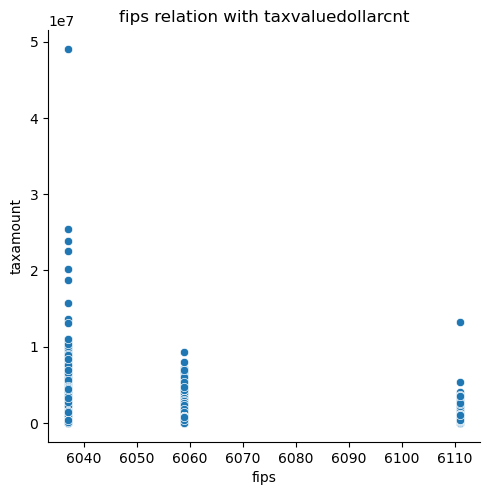

In [67]:

sns.relplot(data=train, x='fips', y='taxvaluedollarcnt')
plt.xlabel('fips')
plt.ylabel('taxamount')
plt.title('fips relation with taxvaluedollarcnt')
plt.show()

In [64]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'taxvaluedollarcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.021904254697438976
p-value: 3.122061966190654e-07


In [65]:
p_value < alpha

True

### We can reject the null hypothesis

## 3. Are regionidzip and calculatedfinishedsquarefeet associated

### Ho: fips does not have a association with calc sqr feet
### Ha: fips does have a association with calc sqr feet

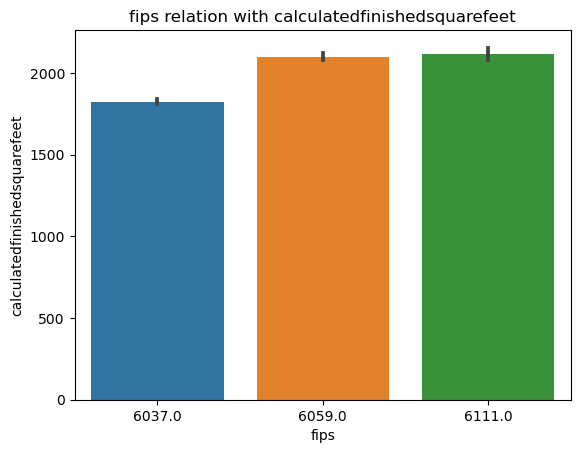

In [79]:
sns.barplot(data=train, x='fips', y='calculatedfinishedsquarefeet')
plt.xlabel('fips')
plt.ylabel('calculatedfinishedsquarefeet')
plt.title('fips relation with calculatedfinishedsquarefeet')
plt.show()

In [80]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'calculatedfinishedsquarefeet'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.10513454749370116
p-value: 1.549946699998952e-133


In [81]:
p_value < alpha

True

### We can reject the null hypothesis

## 4. Is bathroom count and fips related

### Ho: fips does not have a association with bathroom count
### Ha: fips does have a association with bathroom count

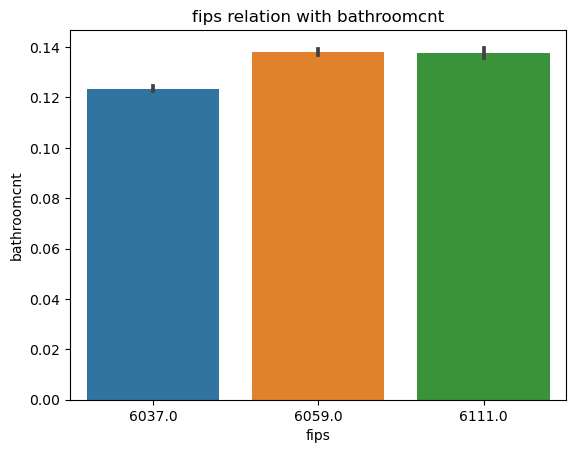

In [83]:
sns.barplot(data=train, x='fips', y='bathroomcnt')
plt.xlabel('fips')
plt.ylabel('bathroomcnt')
plt.title('fips relation with bathroomcnt')
plt.show()

In [84]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'bathroomcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.09011135862057525
p-value: 1.0501928547044596e-98


In [85]:
p_value < alpha

True

### We can reject the null hypothesis

# 5. Is fips and calculatedbathnbr related

### Ho: fips does not have a association with bathnbr
### Ha: fips does have a association with bathnbr

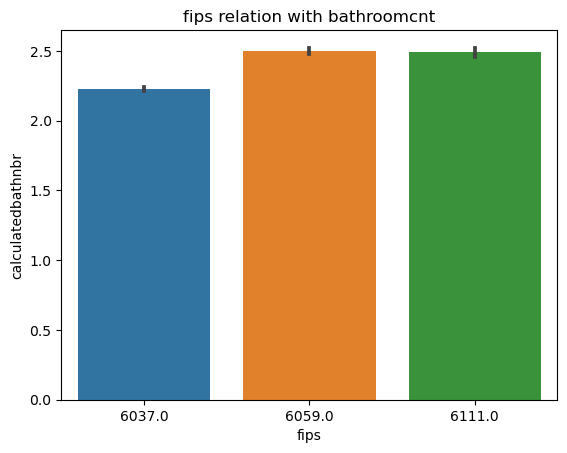

In [88]:
sns.barplot(data=train, x='fips', y='calculatedbathnbr')
plt.xlabel('fips')
plt.ylabel('calculatedbathnbr')
plt.title('fips relation with bathroomcnt')
plt.show()

In [89]:
alpha = 0.05

variable1 = 'fips'
variable2 = 'bathroomcnt'
df_cleaned = df.dropna(subset=[variable1, variable2])
df_cleaned = df_cleaned.replace([np.inf, -np.inf], np.nan).dropna(subset=[variable1, variable2])

correlation_coefficient, p_value = stats.pearsonr(df_cleaned[variable1], df_cleaned[variable2])


print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: 0.09011135862057525
p-value: 1.0501928547044596e-98


In [90]:
p_value < alpha

True

### We can reject the null hypothesis